In [7]:
import pandas as pd

In [38]:
df = pd.read_csv('documentos_tratados.csv')

df.head()

,id,título,conteudo,pagina,total_paginas
0,95d88f6c737c4fcf8817e77b27f441f3,90 anos do 9 a 2: histórias e registros do pol...,agenda tabelas Copyright 20002025 Globo Comun...,0,1
1,e3f6faebb35e4674a735d97696a0625d,A final do Brasileiro de 1971 - Atlético Campeão,A final do Brasileiro de 1971 Atlético Campeã...,0,1
2,60d21add469240cf8b69433560ddaa99,A Letra do Hino do Clube Atlético Mineiro,HINO OFICIAL DO ATLÉTICOMG Adicionado em 07 Fe...,0,1
3,e6588b1392bb4c928ccffb55b721412b,Arena MRV - Clube Atletico Mineiro - Enciclope...,Política de privacidade Sobre a Enciclopédia G...,0,1
4,4d34d32aeb1a475193d6d83ff1075087,"Atlético Mineiro: história, títulos, ídolos, t...",HOME EDUCAÇÃO FÍSICA ESPORTES FUTEBOL ...,0,1


In [39]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import re

nltk.download('punkt')
nltk.download('stopwords')

stopwords_pt = set(stopwords.words('portuguese'))
stopwords_en = set(stopwords.words('english'))
stopwords_es = set(stopwords.words('spanish'))

custom_stopwords = {'nao', 'sim', 'toda', 'fez', 'apenas', 'parte', 'chegou', 'alem', 'assim', 
                    'a', 'ante', 'após', 'ate', 'com', 'contra', 'de', 'desde', 'em', 'entre', 
                    'para', 'perante', 'por', 'sem', 'sob', 'sobre', 'trás', 'hoje', 'ontem', 
                    'amanha', 'tambem', 'mais', 'menos', 'muito', 'pouco', 'cada', 'outro', 
                    'mesmo', 'ainda', 'tanto', 'quanto', 'nunca', 'sempre', 'vez', 'vezes', 
                    'algum', 'alguma', 'alguns', 'algumas', 'nenhum', 'nenhuma', 'todos', 
                    'todas', 'nada', 'tudo', 'outros', 'outras', 'seja', 'foram', 'sera', 
                    'serao', 'esta', 'estao', 'estavam', 'estiveram', 'estivesse', 'estivermos',
                    'ano', 'anos', 'mes', 'meses', 'dia', 'dias', 'hora', 'horas', 'dois', 'um',
                    'segunda', 'segundo', 'primeiro'}

stopwords_full = stopwords_pt.union(stopwords_en).union(stopwords_es).union(custom_stopwords)

def preprocess_text(text):
    text = unidecode(text)  # Remove acentos
    text = re.sub(r'\W+', ' ', text)  # Remove pontuação e caracteres especiais
    text = re.sub(r'\d+', ' ', text)  # Remove números
    text = re.sub(r'\n+', ' ', text) # Remove quebras de linha
    text = re.sub(r'_+', ' ', text) # Remove underline
    tokens = nltk.word_tokenize(text.lower())  # Tokenização e conversão para minúsculas
    tokens = [word for word in tokens if word not in stopwords_full and len(word) > 2]  # Remove stopwords e palavras curtas
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['conteudo'] = df['conteudo'].apply(preprocess_text)
df.head()

,id,título,conteudo,pagina,total_paginas
0,95d88f6c737c4fcf8817e77b27f441f3,90 anos do 9 a 2: histórias e registros do pol...,"[agenda, tabelas, copyright, globo, comunicaca...",0,1
1,e3f6faebb35e4674a735d97696a0625d,A final do Brasileiro de 1971 - Atlético Campeão,"[final, brasileiro, atletico, campeao, galo, g...",0,1
2,60d21add469240cf8b69433560ddaa99,A Letra do Hino do Clube Atlético Mineiro,"[hino, oficial, atleticomg, adicionado, fev, t...",0,1
3,e6588b1392bb4c928ccffb55b721412b,Arena MRV - Clube Atletico Mineiro - Enciclope...,"[politica, privacidade, enciclopedia, galo, di...",0,1
4,4d34d32aeb1a475193d6d83ff1075087,"Atlético Mineiro: história, títulos, ídolos, t...","[home, educacao, fisica, esportes, futebol, ti...",0,1


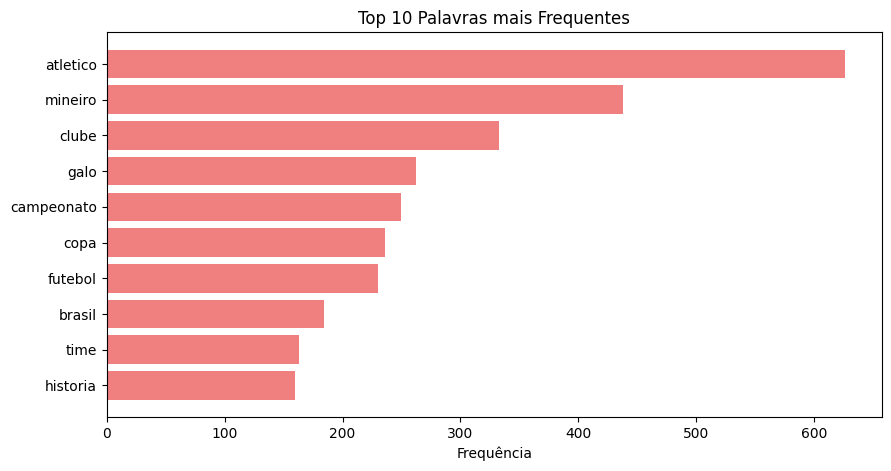

In [41]:
import matplotlib.pyplot as plt
from collections import Counter

# Função para encontrar as 10 palavras mais frequentes
def get_top_words(text_series):
    all_words = []
    for tokens in text_series:
        all_words.extend(tokens)  # Junta todas as palavras de cada texto
    return Counter(all_words).most_common(10)  # Retorna as 10 palavras mais frequentes

# Função para plotar as 10 palavras mais frequentes
def plot_top_words(top_words):
    words = [word for word, _ in top_words]
    counts = [count for _, count in top_words]

    plt.figure(figsize=(10, 5))
    plt.barh(words, counts, color='lightcoral')
    plt.xlabel('Frequência')
    plt.title('Top 10 Palavras mais Frequentes')
    plt.gca().invert_yaxis()
    plt.show()
    
plot_top_words(get_top_words(df['conteudo']))

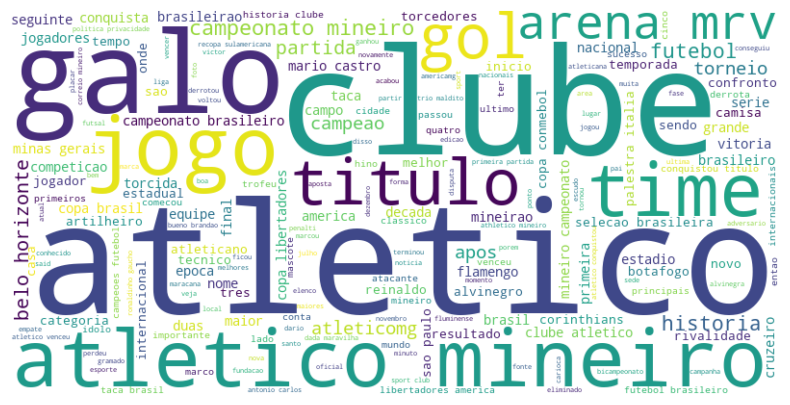

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar uma nuvem de palavras
def generate_wordcloud(text_series):
    all_text = " ".join([" ".join(tokens) for tokens in text_series])  # Combina todos os textos em uma única string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Exibe a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
generate_wordcloud(df['conteudo'])

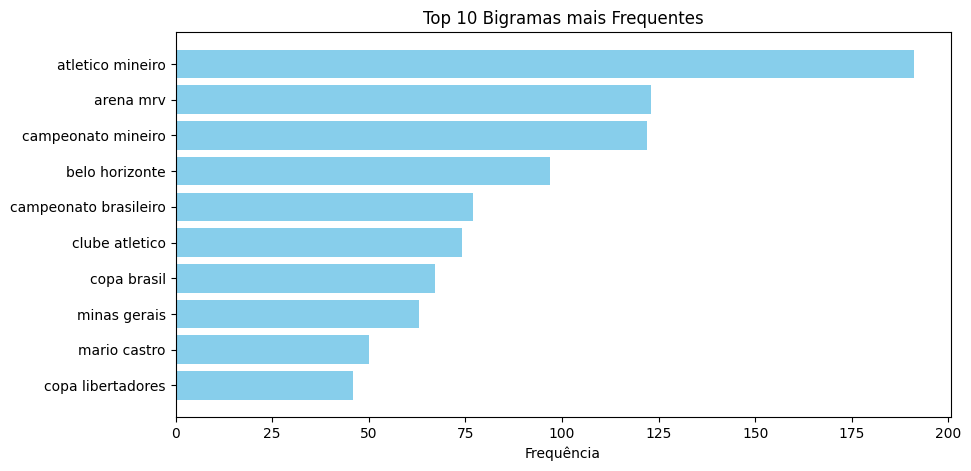

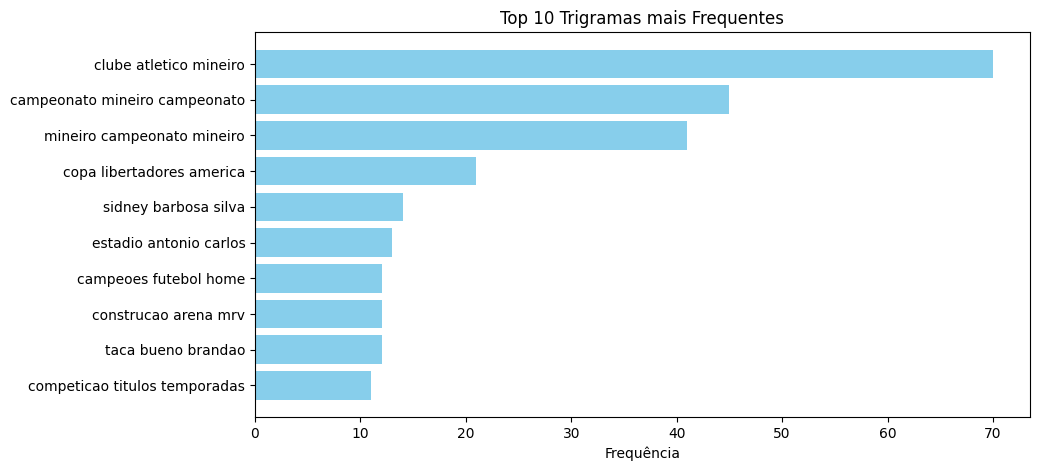

In [43]:
from nltk.util import ngrams

# Função para extrair n-grams e suas frequências
def get_ngrams(text_series, n):
    all_tokens = []
    for tokens in text_series:
        all_tokens.extend(list(ngrams(tokens, n)))  # Gera n-gramas
    return Counter(all_tokens).most_common(10)  # Retorna os 10 n-gramas mais frequentes

# Função para plotar gráficos de barras de bigramas e trigramas
def plot_ngrams(ngrams_list, title):
    ngrams_words = [' '.join(ngram) for ngram, _ in ngrams_list]
    ngrams_counts = [count for _, count in ngrams_list]

    plt.figure(figsize=(10, 5))
    plt.barh(ngrams_words, ngrams_counts, color='skyblue')
    plt.xlabel('Frequência')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()
    
plot_ngrams(get_ngrams(df['conteudo'], 2), 'Top 10 Bigramas mais Frequentes')
plot_ngrams(get_ngrams(df['conteudo'], 3), 'Top 10 Trigramas mais Frequentes')